Richard Pluta

### Required Libraries

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from random import random
from math import sqrt, sin, cos, pi
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Question 1
The following examples from a two-class classification problem are given:
- Class1: [2 2]T, [3 5]T
- Class2: [1 3]T, [-1 -0.5]T

Starting with an augmented weight vector, [1 1 1]T, determine a solution vector for above data using the perceptron learning rule. Show first five steps of weight vector updating.

In [42]:
# Initial bias of 1 appended to each item
class1: np.array = np.array([
    [1, 2, 2],
    [1, 3, 5]
])

class2: np.array = np.array([
    [1, 1, 3],
    [1, -1, -0.5]
])

weight = np.array([[1, 1, 1]])
solutionFound = False
step = 0

while not solutionFound:
    solution = True

    for i in range(len(class1)): 
        value = weight @ class1[i,:]
        if value < 0:
            weight = weight + class1[i,:].T
            solution = False
    for i in range(len(class2)): 
        value = weight @ class2[i,:]
        if value > 0:
            weight = weight - class2[i,:].T
            solution = False

    if step < 5:
        print(f"Weight after {step+1} step(s): {weight}")
        step += 1
    
    solutionFound = solution

print(f"Solution: {weight}")

Weight after 1 step(s): [[-1.   1.  -1.5]]
Weight after 2 step(s): [[-1.   2.  -2.5]]
Weight after 3 step(s): [[-1.   3.  -3.5]]
Weight after 4 step(s): [[-1.   4.  -4.5]]
Weight after 5 step(s): [[ 0.   6.  -2.5]]
Solution: [[ 0.   6.  -2.5]]


# Question 2
Consider the following six examples with three attributes:
| Example # | Color | Shape | Size | Class |
| --- | --- | --- | --- | --- |
| 1 | Red | Square | Big | + |
| 2 | Blue | Square | Big | + |
| 3 | Red | Round | Small | - |
| 4 | Green | Square | Small | - |
| 5 | Red | Round | Big | + |
| 6 | Green | Square |  Big | - |

Determine the best attribute for root node of a decision tree classifier for above data. Use Gini index for attribute selection.

In [43]:
def gini(x, y):
    return 2 * (x / (x + y)) * (y / (x + y))

# Color
red = gini(2, 1)
blue = gini(1, 0)
green = gini(0, 2)

color = red * 3/6 + blue * 1/6 + green * 2/6

# Shape
square = gini(2, 2)
round = gini(1, 1)

shape = square * 4/6 + round * 2/6

# Size
big = gini(3, 1)
small = gini(0, 2)

size = big * 4/6 + small * 2/6

print("Color:", color, "\nShape:", shape, "\nSize:", size)
value = min(color, shape, size)

best = "Color" if value == color else "Shape" if value == shape else "Size" 
print("The best attribute to use for the root node is:", best)


Color: 0.2222222222222222 
Shape: 0.5 
Size: 0.25
The best attribute to use for the root node is: Color


# Question 3
Consider the network of neurons shown on the next page. 
1. With the current input and the weights as shown, determine the output of the network. Assume sigmoidal activation function. 
2. With the specified target output of “1”, determine the value of the updated weight for the connection linking U3 and U5, and U3 and U1.

![](/home/richie/programming/data-mining/assignment-3/question-3.png)

In [44]:
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

input = np.array([1, 0])
w3 = np.array([3, 4])
w4 = np.array([6, 5])
w5 = np.array([2, 4])

def forward(w3, w4, w5):
    h3 = sigmoid(w3 @ input + 1)
    h4 = sigmoid(w4 @ input - 6)
    hidden_input = np.array([h3, h4])
    h5 = sigmoid(w5 @ hidden_input - 3.93)

    return h5

output = forward(w3, w4, w5)
print("Output of network:", output)

Output of network: 0.5085060742863741


In [45]:
target = 1
alpha = 0.5
w3_new, w4_new, w5_new = w3, w4, w5

for i in range(10000):
    output = forward(w3_new, w4_new, w5_new)
    err = target - output
    grad = err * output * (1-output) * input
    w3_new = w3_new + alpha * grad
    w4_new = w4_new + alpha * grad 
    w5_new = w5_new + alpha * grad

print("Final output:", output)
print("Error:", target-output)
print("New w3:", w3_new, "\nNew w4:", w4_new, "\nNew w5:", w5_new)

Final output: 0.9910667359974871
Error: 0.00893326400251293
New w3: [5.86066756 4.        ] 
New w4: [8.86066756 5.        ] 
New w5: [4.86066756 4.        ]


# Question 4
Generate 250 examples each from two classes as per the picture shown below and train a two-layer feed forward network with three sets of hidden neurons, 10, 20, and 30. In each case, determine the training and test accuracy and plot the resulting boundaries. 

![](/home/richie/programming/data-mining/assignment-3/question-4.png)

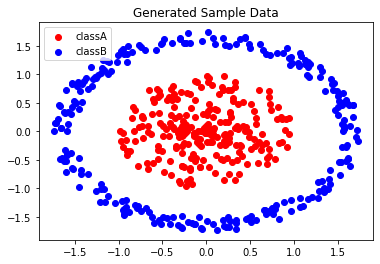

In [46]:
classA, classB = [], []

for i in range(250):
    thetaA = random()*2*pi
    thetaB = random()*2*pi
    rA = random()
    rB = random() * .25 + 1.5

    classA.append([rA * cos(thetaA), rA * sin(thetaA)])
    classB.append([rB * cos(thetaB), rB * sin(thetaB)])

classA, classB = np.array(classA), np.array(classB)
plt.scatter(classA[:, 0], classA[:, 1], label="classA", color="r")
plt.scatter(classB[:, 0], classB[:, 1], label="classB", color="b")
plt.legend()
plt.title("Generated Sample Data")
plt.show() 

Training network with 10 neurons:
	Training accuracy: 1.0
	Testing accuracy: 0.98


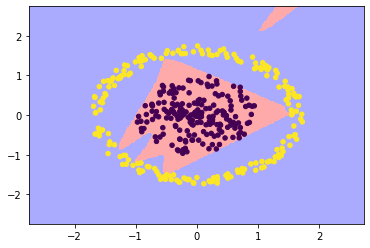

Training network with 20 neurons:
	Training accuracy: 1.0
	Testing accuracy: 1.0


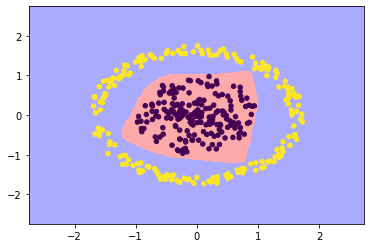

Training network with 30 neurons:
	Training accuracy: 1.0
	Testing accuracy: 0.99


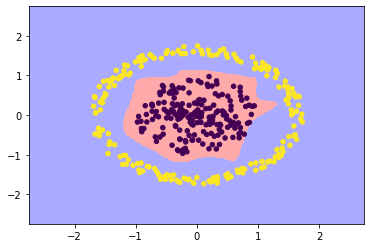

In [47]:
data =  np.append(classA, classB, axis=0)
labels = [0] * 250 + [1] * 250

cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

x_min, x_max = data[:,0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:,1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

neuronSets = [10, 20, 30]
for neurons in neuronSets:
    print(f"Training network with {neurons} neurons:")
    mlp = MLPClassifier(hidden_layer_sizes=neurons, activation="logistic", learning_rate_init=0.05, batch_size=10, solver="lbfgs")
    mlp.fit(X_train, y_train)

    trainAccuracy = mlp.score(X_train, y_train)
    testAccuracy = mlp.score(X_test, y_test)
    print("\tTraining accuracy:", trainAccuracy)
    print("\tTesting accuracy:", testAccuracy)
    
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading="auto")
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=20)
    plt.show()